In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

/Users/pawakapan/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [36]:
tr_data = x_train
ts_data = x_test
tr_labels = []
ts_labels = []
for ytr in y_train:
    tr = np.zeros([10])
    tr[ytr] = 1.0
    tr_labels.append(tr)
for yts in y_test:
    ts = np.zeros([10])
    ts[yts] = 1.0
    ts_labels.append(ts)

tr_data = np.array(tr_data,dtype=np.float32)
ts_data = np.array(ts_data,dtype=np.float32)
tr_labels = np.array(tr_labels,dtype=np.float32)
ts_labels = np.array(ts_labels,dtype=np.float32)

In [37]:
tf.reset_default_graph()

In [38]:
x = tf.placeholder(tf.float32,[None,28,28])
y = tf.placeholder(tf.float32,[None,10])

W1 = tf.Variable(tf.random_normal([784,64],stddev=0.1))
b1 = tf.Variable(tf.random_normal([64],stddev=0.1))

W2 = tf.Variable(tf.random_normal([64,10],stddev=0.1))
b2 = tf.Variable(tf.random_normal([10],stddev=0.1))

x_ = tf.reshape(x,[-1,784])
x1 = tf.matmul(x_,W1)+b1
x1_a = tf.nn.tanh(x1)
x2 = tf.matmul(x1_a,W2)+b2
output = tf.nn.softmax(x2)

loss = tf.losses.softmax_cross_entropy(y,output)

train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

In [39]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [40]:
num_iter = 5000
for i in range(num_iter):
    indices = np.random.randint(len(tr_data),size=[64])
    b_data = tr_data[indices]
    b_labels = tr_labels[indices]
    
    sess.run(train_op,feed_dict={x:b_data,y:b_labels})
    
    if i % (num_iter/10) == 0:
        print("LOSS : " + str(sess.run(loss,feed_dict={x:tr_data,y:tr_labels})))
        preds = sess.run(output,feed_dict={x:tr_data})
        print("ACC : " + str(np.mean(np.equal(np.argmax(preds,axis=1),np.argmax(tr_labels,axis=1)))))

LOSS : 2.3116598
ACC : 0.08883333333333333
LOSS : 1.7162932
ACC : 0.8168
LOSS : 1.6532834
ACC : 0.8500833333333333
LOSS : 1.620149
ACC : 0.8686666666666667
LOSS : 1.6316565
ACC : 0.8608
LOSS : 1.6111432
ACC : 0.87305
LOSS : 1.6133151
ACC : 0.8704
LOSS : 1.6047347
ACC : 0.87525
LOSS : 1.6085148
ACC : 0.8722833333333333
LOSS : 1.5995841
ACC : 0.87765


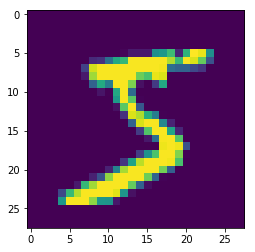

In [41]:
plt.imshow(tr_data[0])
plt.show()

In [42]:
print(sess.run(tf.argmax(output,axis=1),feed_dict={x:[tr_data[0]]}))

[5]


In [43]:
pic_grad = sess.run(tf.gradients(output[:,5],x_),feed_dict={x:[tr_data[0]]})[0][0]

In [44]:
pic_grad

array([-4.84474825e-08, -4.52088926e-08,  7.78716824e-09,  2.52851891e-08,
       -1.58557771e-08, -9.09306852e-09,  7.94443067e-10, -4.69529091e-08,
       -4.53596494e-09,  2.12245439e-08,  2.34572415e-08,  9.82692683e-09,
        3.33431522e-08,  7.22314786e-09,  2.39190587e-08, -2.38871536e-08,
        4.22732604e-09, -2.63061946e-08,  2.14975131e-08,  1.71854015e-08,
       -1.50593955e-08,  6.50245724e-09, -3.05436494e-08, -2.36300757e-08,
       -3.71728959e-08, -1.98090131e-08,  2.95667490e-08,  9.96268490e-09,
        3.70020438e-11, -1.30976217e-08,  4.77121498e-09,  2.16607443e-09,
        1.16413945e-08,  1.03106830e-08,  2.33587172e-09,  4.43765824e-09,
       -5.05084474e-10,  1.58200741e-09,  3.06792813e-08,  2.98256619e-09,
        1.01140463e-09,  1.87764755e-08, -5.97677952e-09,  2.10092583e-08,
        5.02659470e-09, -3.12472146e-08,  4.48423387e-09,  2.07090185e-08,
       -2.61109729e-08, -2.60740709e-08, -3.15917283e-08, -5.34643885e-09,
        7.58226815e-09, -

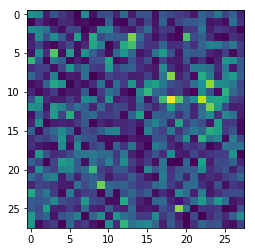

In [45]:
plt.imshow(np.reshape(np.absolute(pic_grad),[28,28]))
plt.show()

In [46]:
# GET UNIQUE VALUES OF EACH PIXEL IN DATASET

unique_vals = []
for pixel in range(784):
    pixel = np.reshape(tr_data,[-1,784])[:,pixel]
    unique_vals.append(np.unique(pixel))

In [47]:
outputs = []
output_ = output[:,5]
for i,uv in enumerate(unique_vals):
    o_ = []
    if i % 50 == 0:
        print(i)
    for xnew in uv:
        dat = np.array(tr_data[0])
        dat[i/28][i%28] = xnew
        op_ = sess.run(output_,feed_dict={x:[dat]})[0]
        o_.append(op_)
    outputs.append(o_)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750


In [48]:
val = sess.run(output[:,5],feed_dict={x:[tr_data[0]]})[0]
delta = []
abs_delta = []
for op in outputs:
    if len(op) == 1:
        delta.append(0.0)
        abs_delta.append(1.0)
    else:
        delta.append(np.sum(val-np.array(op)))
        j = np.sum(np.absolute(val-np.array(op)))
        if j == 0:
            abs_delta.append(1.0)
        else:
            abs_delta.append(j)
delta = np.array(delta)
abs_delta = np.array(abs_delta)

In [49]:
a = delta/abs_delta

TypeError: set_ylabel() takes at least 2 arguments (1 given)

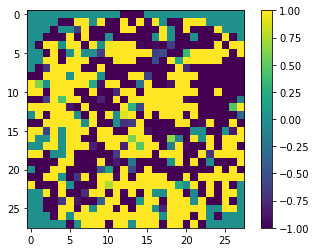

In [50]:
fig, ax = plt.subplots()
im = ax.imshow(np.reshape(a,[28,28]))
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(rotation=-90, va="bottom")